# Depth First Search on the given Graph

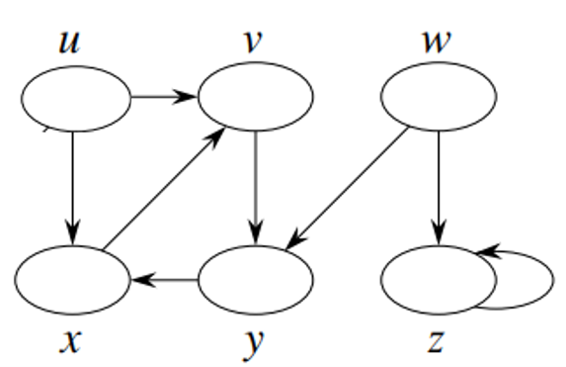

Define the graph as adjacency list.

In [2]:
node_list = ["u","v", "w", "x", "y", "z"]

graph1 = {
    "u": ["v", "x"],
    "v": ["y"],
    "w": ["y", "z"],
    "x": ["v"],
    "y": ["x"],
    "z": ["z"]
}

Global variables and data structures for DFS

In [3]:
color = {}
parent = {}
time_dict = {}
final_time = {}

for i in graph1:
    color[i] = "white"
    parent[i] = None
    time_dict[i] = None
    final_time[i] = None
    time = 0
    
print(color)
print(time_dict)
print(final_time)

{'u': 'white', 'v': 'white', 'w': 'white', 'x': 'white', 'y': 'white', 'z': 'white'}
{'u': None, 'v': None, 'w': None, 'x': None, 'y': None, 'z': None}
{'u': None, 'v': None, 'w': None, 'x': None, 'y': None, 'z': None}



Visits a vertex u in DFS.

Tracks discovery time, finish time, and parent relationships

In [9]:
def dfs(graph1):
    for node in graph1:
        if color[node] == "white":
            dfs_visit(graph1, node)


def dfs_visit(graph1, node):
    global time
    time+= 1
    color[node] = "gray"
    time_dict[node] = time

    for i in graph1[node]:
        if color[i] == "white":
            parent[i] = node
            dfs_visit(graph1,i)
    color[node] = "black"
    time+= 1
    final_time[node] = time

dfs(graph1)
print(color)
print(parent)
print(final_time)
print(time_dict)

{'u': 'black', 'v': 'black', 'w': 'black', 'x': 'black', 'y': 'black', 'z': 'black'}
{'u': None, 'v': 'u', 'w': None, 'x': 'y', 'y': 'v', 'z': 'w'}
{'u': 8, 'v': 7, 'w': 12, 'x': 5, 'y': 6, 'z': 11}
{'u': 1, 'v': 2, 'w': 9, 'x': 4, 'y': 3, 'z': 10}


Visualize the DFS tree

C:\Users\Anu\AppData\Local\Temp\ipykernel_11072\2549531710.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(scatterpoints=1)


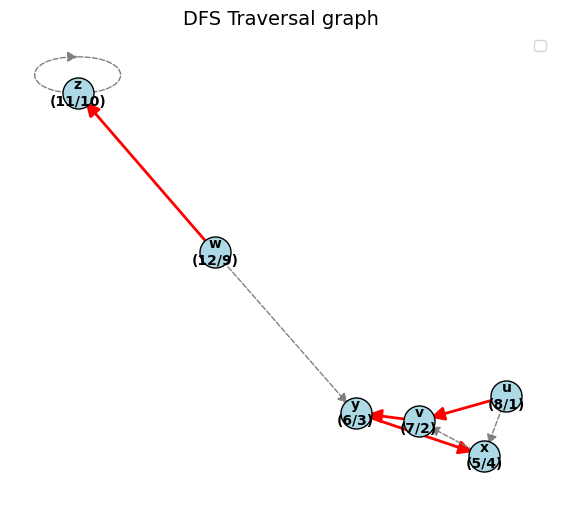

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# --- Build networkx graph ---
G = nx.DiGraph()
for u in graph1:
    for v in graph1[u]:
        G.add_edge(u, v)

# Positioning
pos = nx.spring_layout(G, seed=42)

# Separate DFS tree edges
tree_edges = [(p, u) for u, p in parent.items() if p is not None]
other_edges = [e for e in G.edges() if e not in tree_edges]

# --- Draw Graph ---
plt.figure(figsize=(7,6))

# Draw edges
nx.draw_networkx_edges(G, pos, edgelist=tree_edges, edge_color="red", arrows=True, arrowsize=20, width=2, label="DFS Tree")
nx.draw_networkx_edges(G, pos, edgelist=other_edges, edge_color="gray", style="dashed", arrows=True, arrowsize=15, label="Other Edges")

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=500, edgecolors="black")

# Labels: show d/f times
labels = {u: f"{u}\n({final_time[u]}/{time_dict[u]})" for u in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_weight="bold")

plt.title("DFS Traversal graph", fontsize=14)
plt.legend(scatterpoints=1)
plt.axis("off")
plt.show()